In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os

In [2]:
tf.data.Dataset??

In [3]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 40000 files belonging to 2 classes.


In [4]:
data_iterator = data.as_numpy_iterator()

In [5]:
data_iterator

In [6]:
batch = data_iterator.next()

In [7]:
batch

(array([[[[213.      , 213.      , 213.      ],
          [211.33984 , 211.33984 , 211.33984 ],
          [210.2832  , 210.2832  , 210.2832  ],
          ...,
          [220.15039 , 218.15039 , 219.15039 ],
          [217.66016 , 215.66016 , 216.66016 ],
          [216.      , 214.      , 215.      ]],
 
         [[212.16992 , 212.16992 , 212.16992 ],
          [211.19879 , 211.19879 , 211.19879 ],
          [210.2832  , 210.2832  , 210.2832  ],
          ...,
          [220.98047 , 218.98047 , 219.98047 ],
          [218.49023 , 216.49023 , 217.49023 ],
          [216.83008 , 214.83008 , 215.83008 ]],
 
         [[212.      , 212.      , 212.      ],
          [211.16992 , 211.16992 , 211.16992 ],
          [210.2832  , 210.2832  , 210.2832  ],
          ...,
          [221.86719 , 219.86719 , 220.86719 ],
          [219.25516 , 217.25516 , 218.25516 ],
          [217.      , 215.      , 216.      ]],
 
         ...,
 
         [[223.      , 223.      , 223.      ],
          [223.   

In [8]:
len(batch)

2

In [11]:
batch[0].shape

(32, 256, 256, 3)

In [13]:
# CLASS 0 HEALTHY WALL CLASS 1 DAMAGED #
batch[1]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

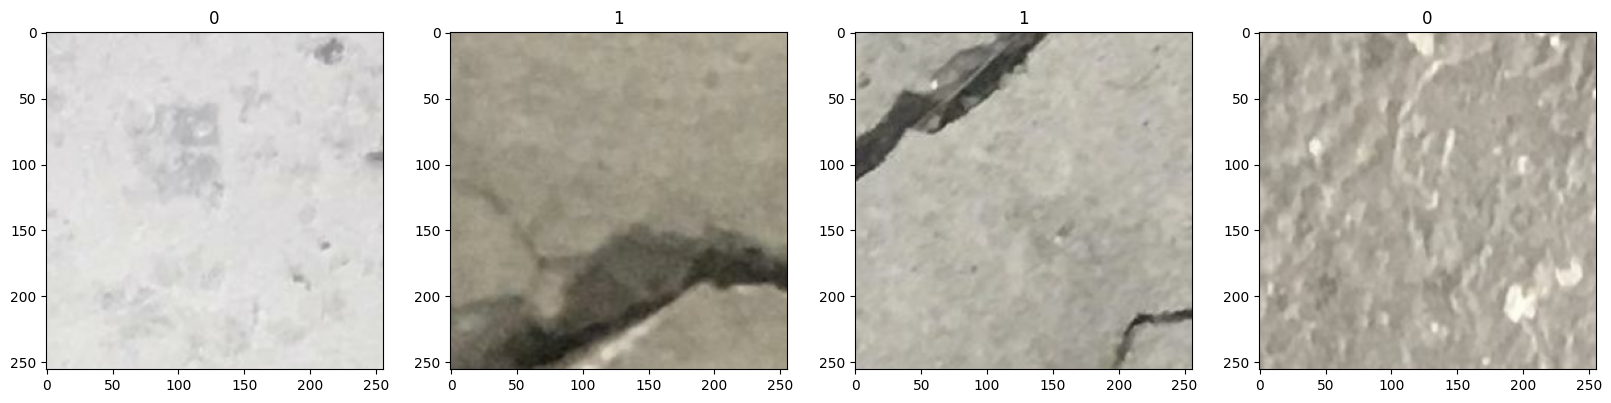

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [15]:
##SCALE DATA ##

data = data.map(lambda x,y: (x/255, y))



In [16]:
data.as_numpy_iterator().next()

(array([[[[0.8039216 , 0.7882353 , 0.7529412 ],
          [0.80717677, 0.7914905 , 0.7561964 ],
          [0.81346506, 0.7977788 , 0.76248467],
          ...,
          [0.85993415, 0.8324832 , 0.8011106 ],
          [0.8634115 , 0.8359605 , 0.8045879 ],
          [0.8666667 , 0.8392157 , 0.80784315]],
 
         [[0.80717677, 0.7914905 , 0.7561964 ],
          [0.81043196, 0.7947457 , 0.75945157],
          [0.8167203 , 0.80103403, 0.7657399 ],
          ...,
          [0.85993415, 0.8324832 , 0.8011106 ],
          [0.8628583 , 0.8354073 , 0.80403477],
          [0.8634115 , 0.8359605 , 0.8045879 ]],
 
         [[0.8106541 , 0.79496783, 0.7596737 ],
          [0.8139093 , 0.798223  , 0.7629289 ],
          [0.8181827 , 0.80249643, 0.7672023 ],
          ...,
          [0.859138  , 0.83168703, 0.8003145 ],
          [0.85993415, 0.8324832 , 0.8011106 ],
          [0.85993415, 0.8324832 , 0.8011106 ]],
 
         ...,
 
         [[0.8392157 , 0.8235294 , 0.78039217],
          [0.83596

In [19]:
len(data)

1250

In [20]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [22]:
val_size

250

In [21]:
test_size

125

In [23]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [24]:
len(train)

875

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [30]:
logdir='logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [31]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
875/875 [==============================] - 1713s 2s/step - loss: 0.1623 - accuracy: 0.9504 - val_loss: 0.0515 - val_accuracy: 0.9847
Epoch 2/20
875/875 [==============================] - 1749s 2s/step - loss: 0.0467 - accuracy: 0.9850 - val_loss: 0.0341 - val_accuracy: 0.9902
Epoch 3/20
875/875 [==============================] - 1743s 2s/step - loss: 0.0705 - accuracy: 0.9778 - val_loss: 0.0450 - val_accuracy: 0.9847
Epoch 4/20
875/875 [==============================] - 1757s 2s/step - loss: 0.0396 - accuracy: 0.9869 - val_loss: 0.0348 - val_accuracy: 0.9885
Epoch 5/20
875/875 [==============================] - 1751s 2s/step - loss: 0.0280 - accuracy: 0.9905 - val_loss: 0.0307 - val_accuracy: 0.9893
Epoch 6/20
875/875 [==============================] - 1737s 2s/step - loss: 0.0254 - accuracy: 0.9921 - val_loss: 0.0342 - val_accuracy: 0.9886
Epoch 7/20
875/875 [==============================] - 1747s 2s/step - loss: 0.0212 - accuracy: 0.9939 - val_loss: 0.0321 - val_accuracy:

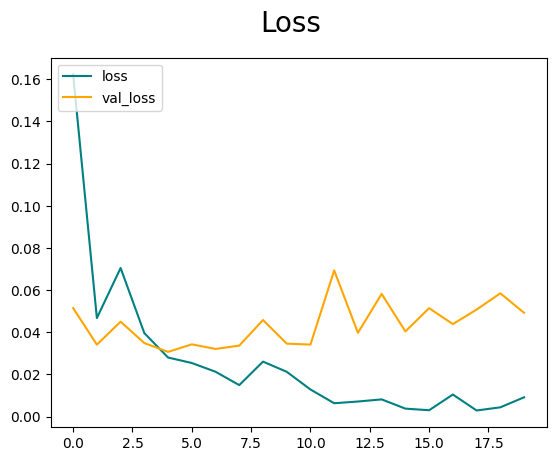

In [32]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show();

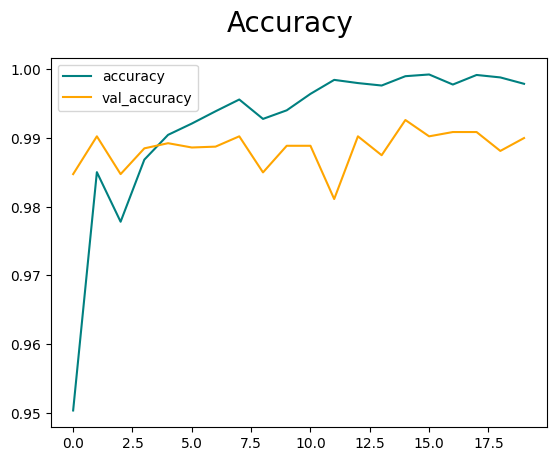

In [33]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show();

In [34]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [35]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 644ms/step


In [36]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9914787, shape=(), dtype=float32) tf.Tensor(0.98505974, shape=(), dtype=float32) tf.Tensor(0.98825, shape=(), dtype=float32)


In [38]:
import cv2

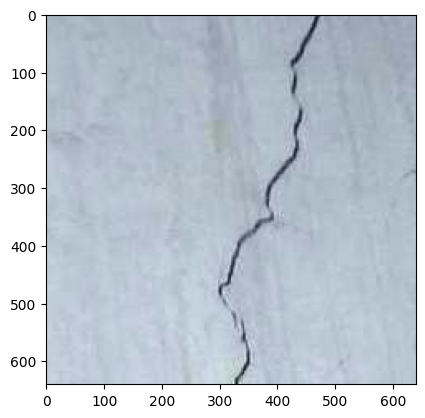

In [39]:
img = cv2.imread('test1.jpg')
plt.imshow(img)
plt.show();

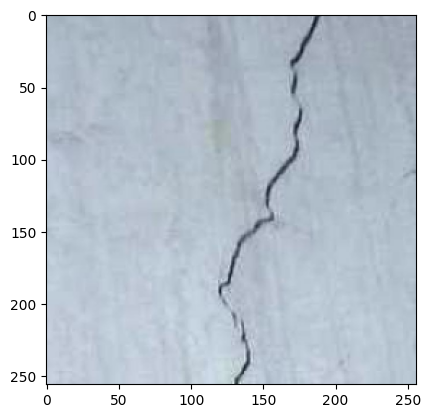

In [40]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show();

In [41]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 1s 656ms/step


In [42]:
yhat

array([[0.99999934]], dtype=float32)

In [44]:
if yhat > 0.5: 
    print(f'Predicted class is DAMAGED')
else:
    print(f'Predicted class is HEALTHY')

Predicted class is DAMAGED


In [45]:
from tensorflow.keras.models import load_model

model.save(os.path.join('models','imageclassifier.h5'))

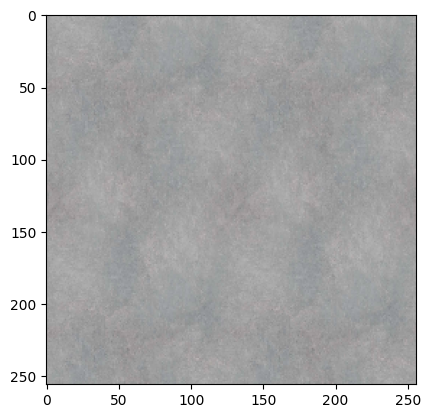

In [50]:
img2 = cv2.imread('tes4.jpg')
resize2 = tf.image.resize(img2, (256,256))
plt.imshow(resize2.numpy().astype(int))
plt.show();

In [51]:
yhat = model.predict(np.expand_dims(resize2/255, 0))

1/1 [==============================] - 0s 197ms/step


In [52]:
if yhat > 0.5: 
    print(f'Predicted class is DAMAGED')
else:
    print(f'Predicted class is HEALTHY')

Predicted class is HEALTHY


In [54]:
import tensorflow as tf

# Load the original model from the .h5 file
model = tf.keras.models.load_model('imageclassifier.h5')

# Quantize the model to 16-bit floating-point format
quantized_model = tf.keras.models.clone_model(model)
quantized_model = tf.keras.models.load_model('imageclassifier.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(quantized_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
quantized_tflite_model = converter.convert()

# Save the quantized model to a .tflite file
with open('quantized_model.tflite', 'wb') as f:
    f.write(quantized_tflite_model)


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmpslod0ud4\assets


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmpslod0ud4\assets
